In [3]:
import pandas as pd

In [4]:
#load csv data
df = pd.read_csv('/content/diabetes.csv')

#head
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#check datatypes
df.dtypes

,0
Pregnancies,int64
Glucose,int64
BloodPressure,int64
SkinThickness,int64
Insulin,int64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [6]:
#check for missing values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Exploratory Data Analysis [EDA]

In [7]:
#generate summary statistics
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


visualize the distribution of key features using histograms and box plot

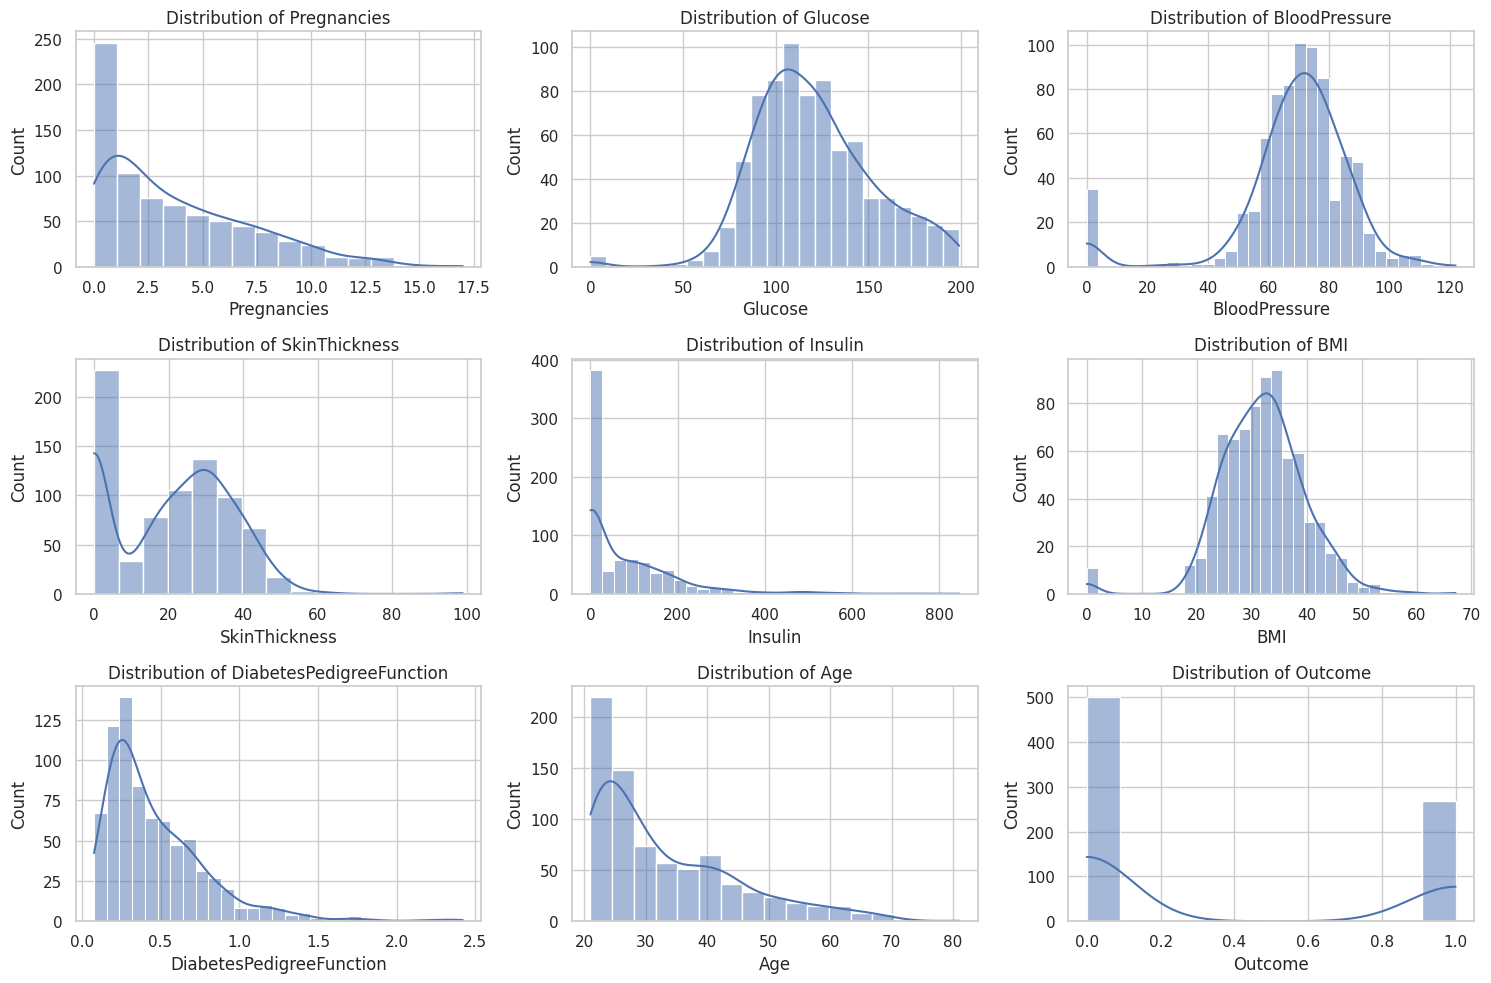

In [10]:
#histogram
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for plots
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

# List of features to plot
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome']

# Plot histograms for each feature
for i, feature in enumerate(features):
    sns.histplot(df[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {feature}')

plt.tight_layout()
plt.show()


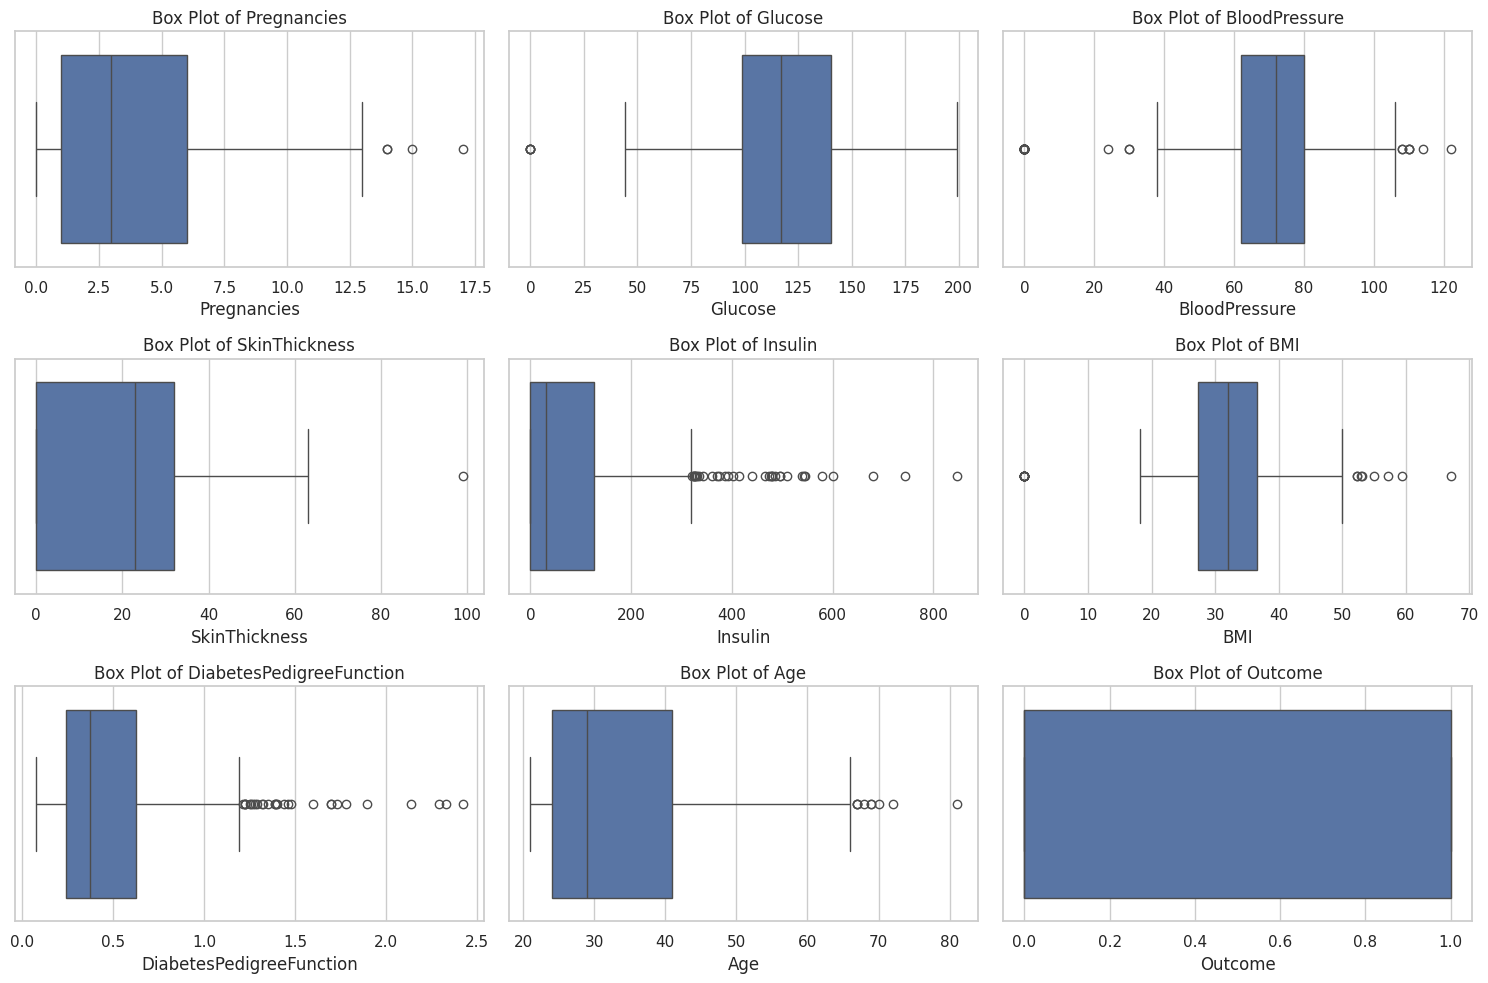

In [11]:
#box plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=df[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()


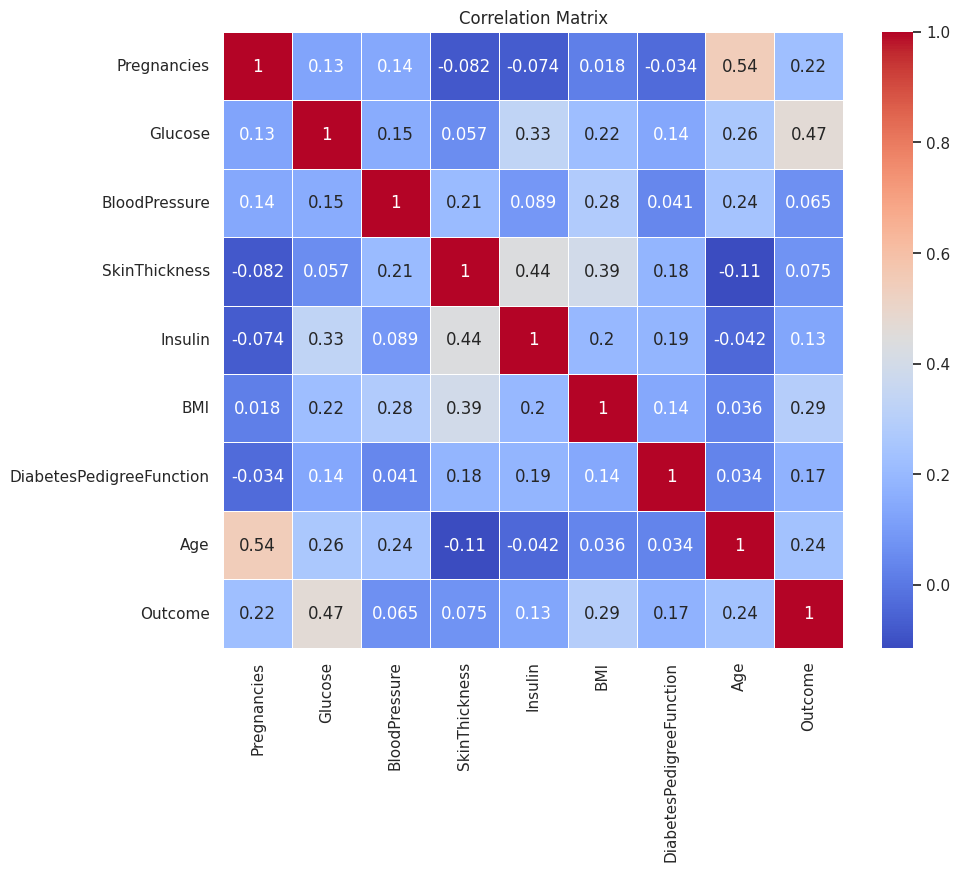

In [15]:
# Compute the correlation matrix
corr_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


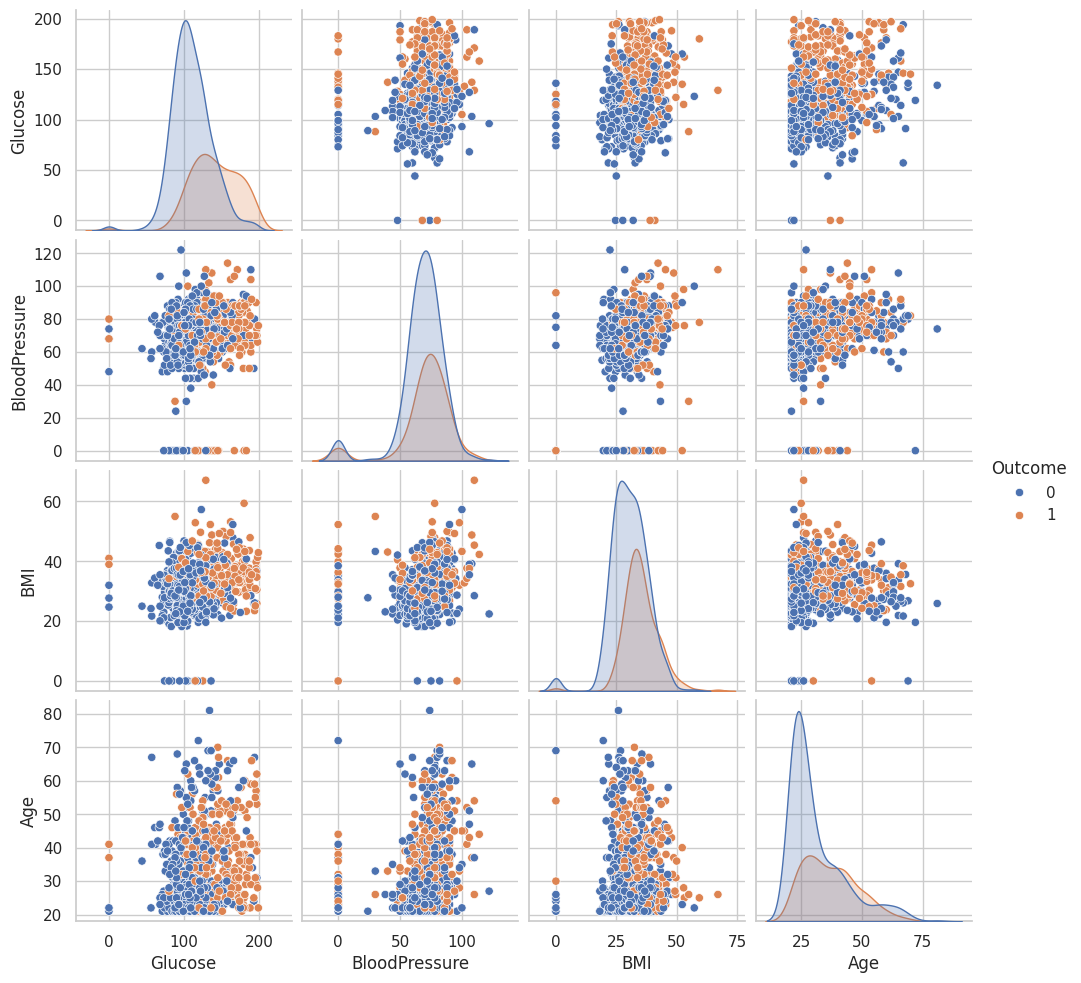

In [19]:
# Create a pair plot focusing on key features
sns.pairplot(df, hue='Outcome', vars=['Glucose', 'BloodPressure', 'BMI', 'Age'])
plt.show()

Handling Outliers with Winsorization

In [20]:
#create a copy of df and call it data
data = df.copy()


In [24]:
import numpy as np

# Function to apply winsorization with more aggressive percentiles
def winsorize(data, column, lower_percentile=2.5, upper_percentile=97.5):
    lower_threshold = np.percentile(data[column], lower_percentile)
    upper_threshold = np.percentile(data[column], upper_percentile)
    data[column] = np.where(data[column] < lower_threshold, lower_threshold, data[column])
    data[column] = np.where(data[column] > upper_threshold, upper_threshold, data[column])
    return data

# Apply winsorization to specific columns with more aggressive percentiles
data = winsorize(data, 'Insulin', lower_percentile=2.5, upper_percentile=97.5)
data = winsorize(data, 'SkinThickness', lower_percentile=2.5, upper_percentile=97.5)

# Verify the results
print(data.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.358073   76.295573   
std       3.369578   31.972618      19.355807      15.509115  101.214027   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      47.000000  400.250000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

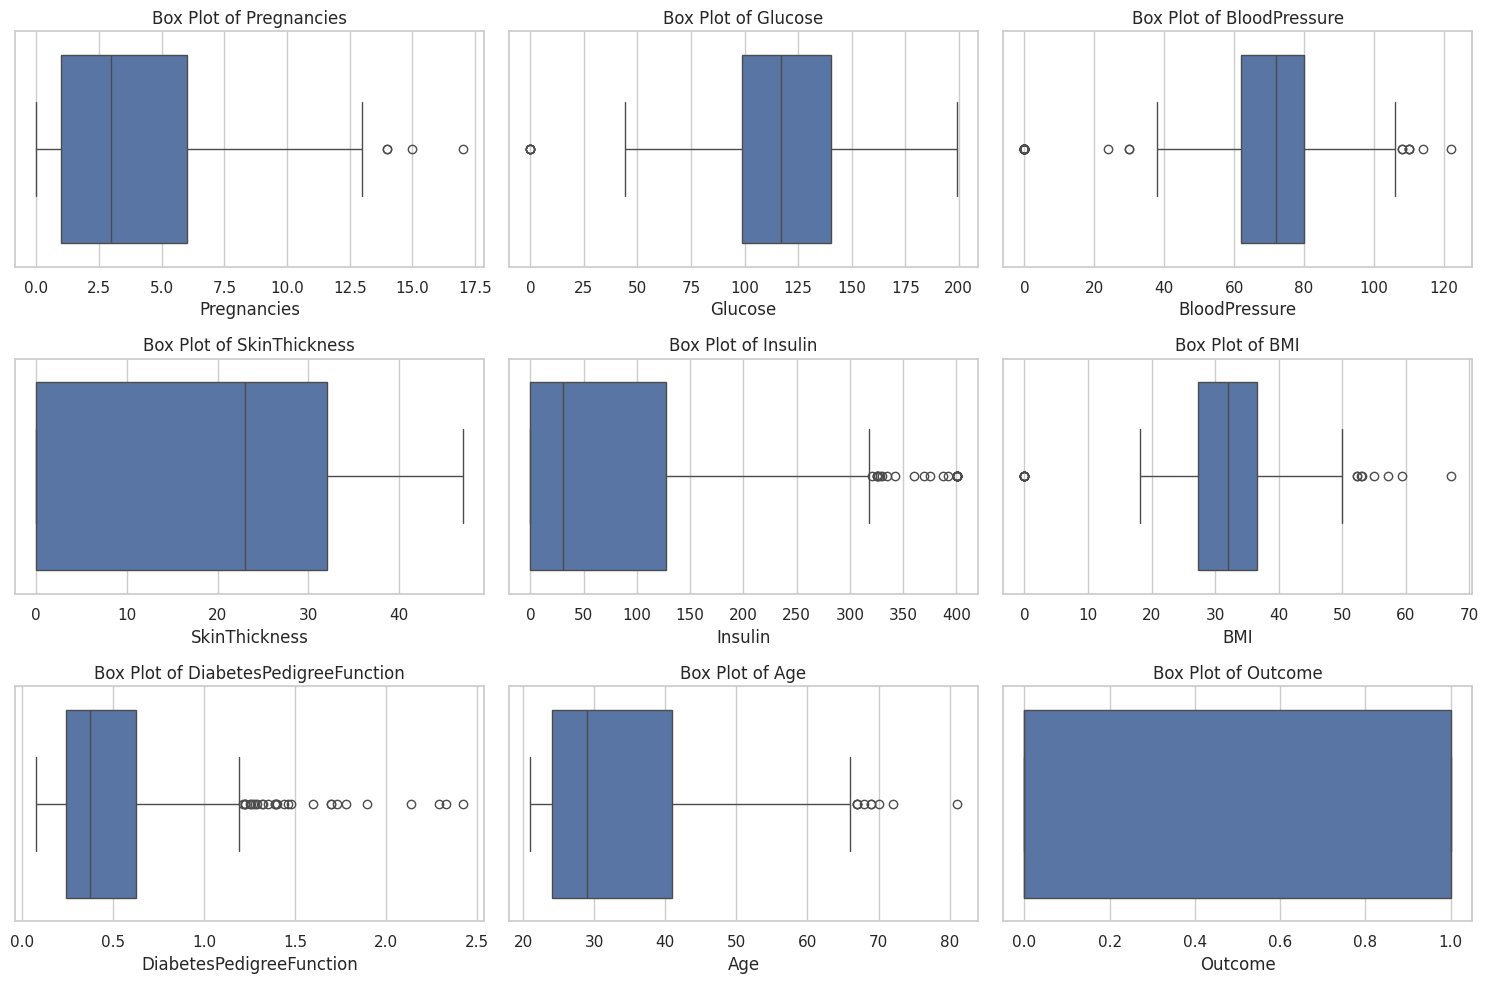

In [25]:
#box plot
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
axes = axes.flatten()

for i, feature in enumerate(features):
    sns.boxplot(x=data[feature], ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')

plt.tight_layout()
plt.show()

Feature Engineering.

In [27]:
#Create a categorical feature based on BMI values to represent weight categories
def create_bmi_category(row):
    if row['BMI'] < 18.5:
        return 'Underweight'
    elif 18.5 <= row['BMI'] < 25:
        return 'Normal weight'
    elif 25 <= row['BMI'] < 30:
        return 'Overweight'
    else:
        return 'Obesity'

data['BMICategory'] = data.apply(create_bmi_category, axis=1)

In [28]:
#Create a categorical feature based on glucose levels to represent diabetes risk
def create_glucose_category(row):
    if row['Glucose'] < 100:
        return 'Normal'
    elif 100 <= row['Glucose'] < 126:
        return 'Impaired'
    else:
        return 'Diabetic'

data['GlucoseCategory'] = data.apply(create_glucose_category, axis=1)

Feature Transformation

In [29]:
#Apply a log transformation to skewed features like Insulin
data['Insulin_Log'] = np.log1p(data['Insulin'])

In [30]:
#Standardize features to have zero mean and unit variance
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data[['Glucose', 'BMI', 'Age']] = scaler.fit_transform(data[['Glucose', 'BMI', 'Age']])

In [32]:
#Select features with the highest correlation to the target variable (Outcome)
numeric_data = data.select_dtypes(include=np.number)  # Select only numeric columns
corr_matrix = numeric_data.corr()
relevant_features = corr_matrix[abs(corr_matrix['Outcome']) > 0.2].index.tolist()
data_selected = data[relevant_features]

In [35]:
#Use a model like Random Forest to assess feature importance:
#Use a model like Random Forest to assess feature importance:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Assuming 'data' is your DataFrame with categorical features
categorical_features = ['BMICategory', 'GlucoseCategory']  # Add any other categorical features

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for RandomForest

# Fit and transform the categorical features
encoded_data = encoder.fit_transform(data[categorical_features])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_features))

# Concatenate the encoded features with the original DataFrame
X = pd.concat([data.drop(categorical_features + ['Outcome'], axis=1), encoded_df], axis=1)
y = data['Outcome']

model = RandomForestClassifier()
model.fit(X, y)

importances = pd.Series(model.feature_importances_, index=X.columns)
important_features = importances[importances > 0.05].index.tolist()
data_selected = pd.concat([data[['Outcome']], X[important_features]], axis=1)

In [36]:
#Encode the BMICategory feature:
data = pd.get_dummies(data, columns=['BMICategory'], prefix='BMI')

In [37]:
#Create interaction terms between features to capture combined effects.
data['Age_BMI_Interaction'] = data['Age'] * data['BMI']

In [38]:
#Create polynomial features to capture non-linear relationships.
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, include_bias=False)
poly_features = poly.fit_transform(data[['Glucose', 'BMI', 'Age']])
poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['Glucose', 'BMI', 'Age']))
data = pd.concat([data, poly_df], axis=1)

Split The Data

In [39]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Verify the split
print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

Training set size: 614
Testing set size: 154


Train A Model

In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [45]:
# Identify non-numeric features
non_numeric_features = data.select_dtypes(include=['object', 'category']).columns.tolist()
print("Non-numeric features:", non_numeric_features)

# Apply one-hot encoding to non-numeric features
data = pd.get_dummies(data, columns=non_numeric_features)

# Re-split the data after encoding
X = data.drop('Outcome', axis=1)
y = data['Outcome']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Non-numeric features: ['GlucoseCategory']


In [47]:
# Separate features (X) and target variable (y)
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']               # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [48]:
# Initialize the logistic regression model with class weights to handle imbalance
model = LogisticRegression(class_weight='balanced', random_state=42)

# Train the model
model.fit(X_train, y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', random_state=42)

In [49]:
# Make predictions on the test set
y_pred = model.predict(X_test)
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probabilities for ROC-AUC

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate ROC-AUC score
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC-AUC Score: {roc_auc:.4f}")

Accuracy: 0.7338
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.72      0.78        99
           1       0.60      0.76      0.67        55

    accuracy                           0.73       154
   macro avg       0.72      0.74      0.72       154
weighted avg       0.76      0.73      0.74       154

Confusion Matrix:
[[71 28]
 [13 42]]
ROC-AUC Score: 0.8119


Let us try improving the accuracy by Hyperparameter Tuning

In [50]:
from sklearn.model_selection import GridSearchCV

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'solver': ['liblinear', 'saga']        # Optimization algorithms
}

# Initialize Grid Search
grid_search = GridSearchCV(
    estimator=LogisticRegression(class_weight='balanced', random_state=42),
    param_grid=param_grid,
    cv=5,  # 5-fold cross-validation
    scoring='roc_auc',  # Use ROC-AUC as the scoring metric
    n_jobs=-1  # Use all available CPU cores
)

# Fit Grid Search to the training data
grid_search.fit(X_train, y_train)

# Best parameters and score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC-AUC Score: {grid_search.best_score_:.4f}")

# Train the model with the best parameters
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

# Evaluate the tuned model
y_pred_tuned = best_model.predict(X_test)
y_pred_proba_tuned = best_model.predict_proba(X_test)[:, 1]

# Calculate metrics
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
print(f"\nTuned Accuracy: {accuracy_tuned:.4f}")
print("Tuned Classification Report:")
print(classification_report(y_test, y_pred_tuned))
print("Tuned Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_tuned))
print(f"Tuned ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_tuned):.4f}")

Best Parameters: {'C': 10, 'solver': 'liblinear'}
Best ROC-AUC Score: 0.8516

Tuned Accuracy: 0.7468
Tuned Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.74      0.79        99
           1       0.62      0.76      0.68        55

    accuracy                           0.75       154
   macro avg       0.73      0.75      0.74       154
weighted avg       0.77      0.75      0.75       154

Tuned Confusion Matrix:
[[73 26]
 [13 42]]
Tuned ROC-AUC Score: 0.8250


Try Different Algorithms like Random Forest

In [51]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest model
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_rf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_rf):.4f}")

Random Forest Results:
Accuracy: 0.7338
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
[[78 21]
 [20 35]]
ROC-AUC Score: 0.8033


Support Vector Machine (SVM)

In [52]:
from sklearn.svm import SVC
from sklearn.calibration import CalibratedClassifierCV

# Initialize the SVM model
svm_model = SVC(class_weight='balanced', probability=True, random_state=42)

# Train the model
svm_model.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_model.predict(X_test)
y_pred_proba_svm = svm_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("SVM Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_svm):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_svm))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_svm):.4f}")

SVM Results:
Accuracy: 0.5000
Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.28      0.42        99
           1       0.41      0.89      0.56        55

    accuracy                           0.50       154
   macro avg       0.62      0.59      0.49       154
weighted avg       0.68      0.50      0.47       154

Confusion Matrix:
[[28 71]
 [ 6 49]]
ROC-AUC Score: 0.6943


Gradient Boosting

In [53]:
from sklearn.ensemble import GradientBoostingClassifier

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Train the model
gb_model.fit(X_train, y_train)

# Make predictions
y_pred_gb = gb_model.predict(X_test)
y_pred_proba_gb = gb_model.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Gradient Boosting Results:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_gb):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred_gb))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))
print(f"ROC-AUC Score: {roc_auc_score(y_test, y_pred_proba_gb):.4f}")

Gradient Boosting Results:
Accuracy: 0.7273
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.77      0.78        99
           1       0.61      0.65      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
[[76 23]
 [19 36]]
ROC-AUC Score: 0.8116


XGBoost